# Resampling animation

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(17)
plt.rcParams["figure.dpi"] = 75
plt.rcParams["figure.figsize"] = [6, 3.5]

<IPython.core.display.Javascript object>

In [3]:
nrows, ncols = 7, 12
# nrows, ncols = 6, 11


xs = np.arange(ncols)
ys = nrows - np.arange(nrows) - 1
X1, Y1 = np.meshgrid(xs, ys, indexing="xy")

<IPython.core.display.Javascript object>

In [4]:
X0 = np.full_like(X1, 0)
Y0 = Y1

<IPython.core.display.Javascript object>

In [5]:
def make_selection(nrows, ncols, nselect):
    array = np.zeros((nrows, ncols))
    row_indices = np.random.randint(nrows, size=nselect)
    col_indices = np.random.randint(ncols, size=nselect)
    array[row_indices, col_indices] = 1
    return array

<IPython.core.display.Javascript object>

In [6]:
np.random.seed(1)

alpha0 = np.full((nrows, ncols), 0)
alpha0[:, 0] = 1
alpha1 = np.full((nrows, ncols), 1)
alpha2 = make_selection(nrows, ncols, nrows)

<IPython.core.display.Javascript object>

In [7]:
indices = np.transpose(np.nonzero(alpha2))
X2 = np.zeros_like(X0)
Y2 = np.zeros_like(Y0)

for k, (i, j) in enumerate(indices):
    X2[i, j] = xs.max()
    Y2[i, j] = ys.max() - k

<IPython.core.display.Javascript object>

In [8]:
from scipy.special import expit


def interpolate(A0, A1, t):
    if t > 0 and t < 1:
        t = expit((t - 0.5) * 10)
    return A0 * (1 - t) + A1 * t

<IPython.core.display.Javascript object>

In [9]:
markers = ["o", "s", "d", "^", "p", "P", "H", "v", "<", ">"]
colors = plt.cm.tab10.colors


def draw_array(X, Y, alphas):
    """Draw an array of shapes.

    X: array of x coordinates
    Y: array of y coordinates
    alphas: array of transparency parameters
    """
    plt.clf()

    nrows, ncols = X.shape
    for i in range(nrows):
        marker, color = markers[i], colors[i]
        [
            plt.plot(X[i, j], Y[i, j], marker, color=color, ms=12, alpha=alphas[i, j])
            for j in range(ncols)
        ]

    plt.xlim(-0.5, ncols - 0.5)
    plt.ylim(-0.5, nrows - 0.5)

    # remove spines
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_ticks([])

    plt.tight_layout()

<IPython.core.display.Javascript object>

In [10]:
def draw_phase1(t):
    X = interpolate(X0, X1, t)
    Y = interpolate(Y0, Y1, t)
    alpha = interpolate(alpha0, alpha1, t)
    draw_array(X, Y, alpha)

<IPython.core.display.Javascript object>

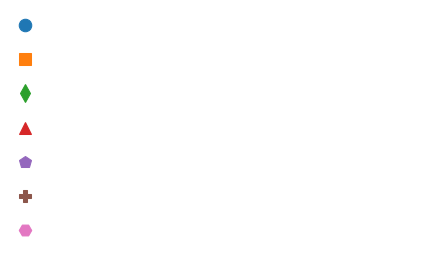

<IPython.core.display.Javascript object>

In [11]:
draw_phase1(0)
plt.savefig("resampling_phase0.png", dpi=300)

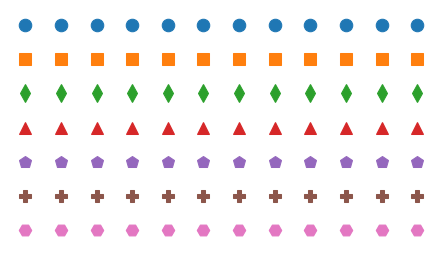

<IPython.core.display.Javascript object>

In [12]:
draw_phase1(1)

In [13]:
def draw_phase2(t):
    alpha = interpolate(alpha1, alpha2, t)
    draw_array(X1, Y1, alpha)

<IPython.core.display.Javascript object>

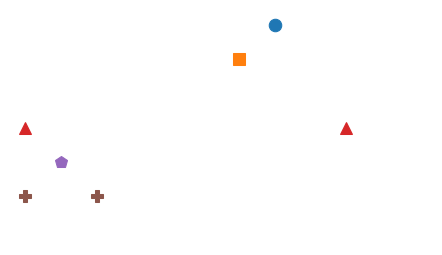

<IPython.core.display.Javascript object>

In [14]:
draw_phase2(1)

In [15]:
def draw_phase3(t):
    X = interpolate(X1, X2, t)
    Y = interpolate(Y1, Y2, t)
    alpha = alpha2
    draw_array(X, Y, alpha)

<IPython.core.display.Javascript object>

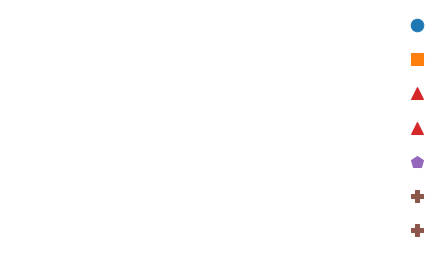

<IPython.core.display.Javascript object>

In [16]:
draw_phase3(1)

In [17]:
import imageio
from io import BytesIO


def savegif(filename, draw_frame_func):
    num_frames = 24
    frames = []

    for i in range(num_frames):
        t = i / (num_frames - 1)
        draw_frame_func(t)

        # Save the frame to a BytesIO object
        buf = BytesIO()
        plt.savefig(buf, format="png", dpi=300)
        buf.seek(0)
        frames.append(imageio.v2.imread(buf))

    # Save frames as GIF
    plt.close()
    imageio.mimsave(filename, frames, duration=1 / 24)

<IPython.core.display.Javascript object>

In [18]:
filename1 = "resampling_phase1.gif"
savegif(filename1, draw_phase1)

<IPython.core.display.Javascript object>

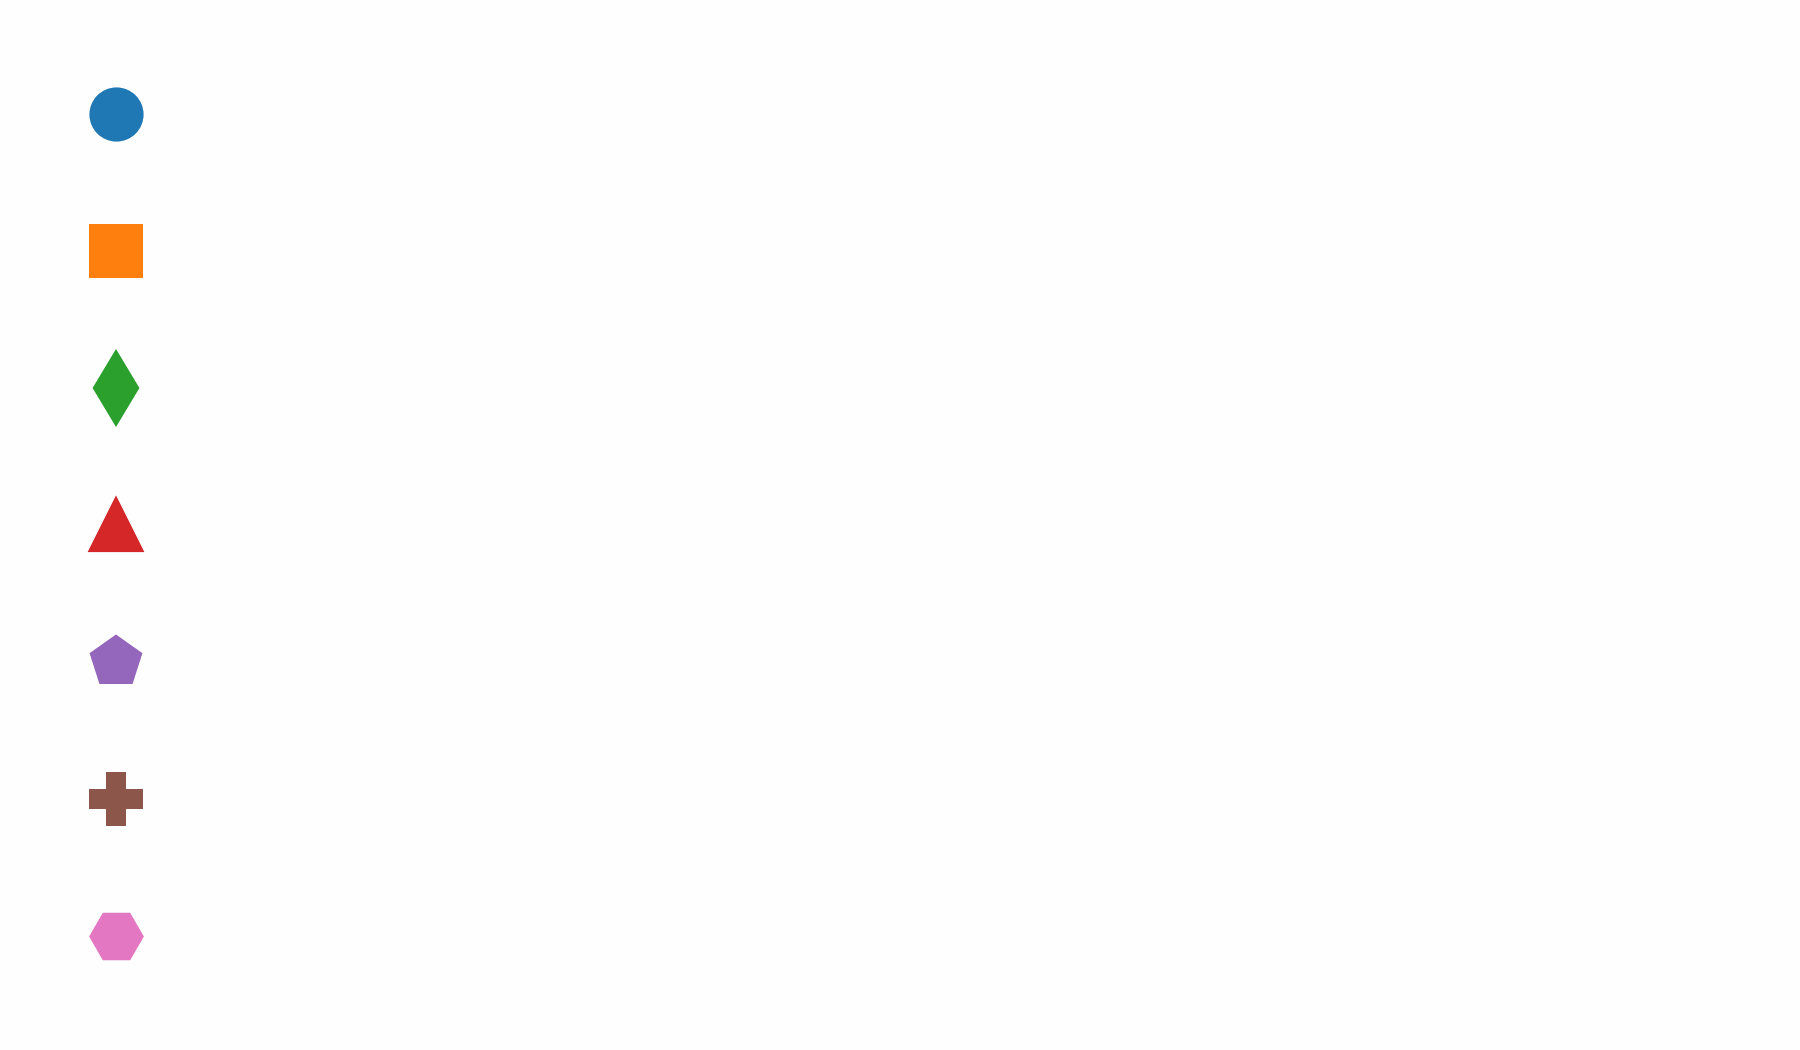

<IPython.core.display.Javascript object>

In [19]:
from IPython.display import display, Image

display(Image(filename=filename1))

In [20]:
filename2 = "resampling_phase2.gif"
savegif(filename2, draw_phase2)

<IPython.core.display.Javascript object>

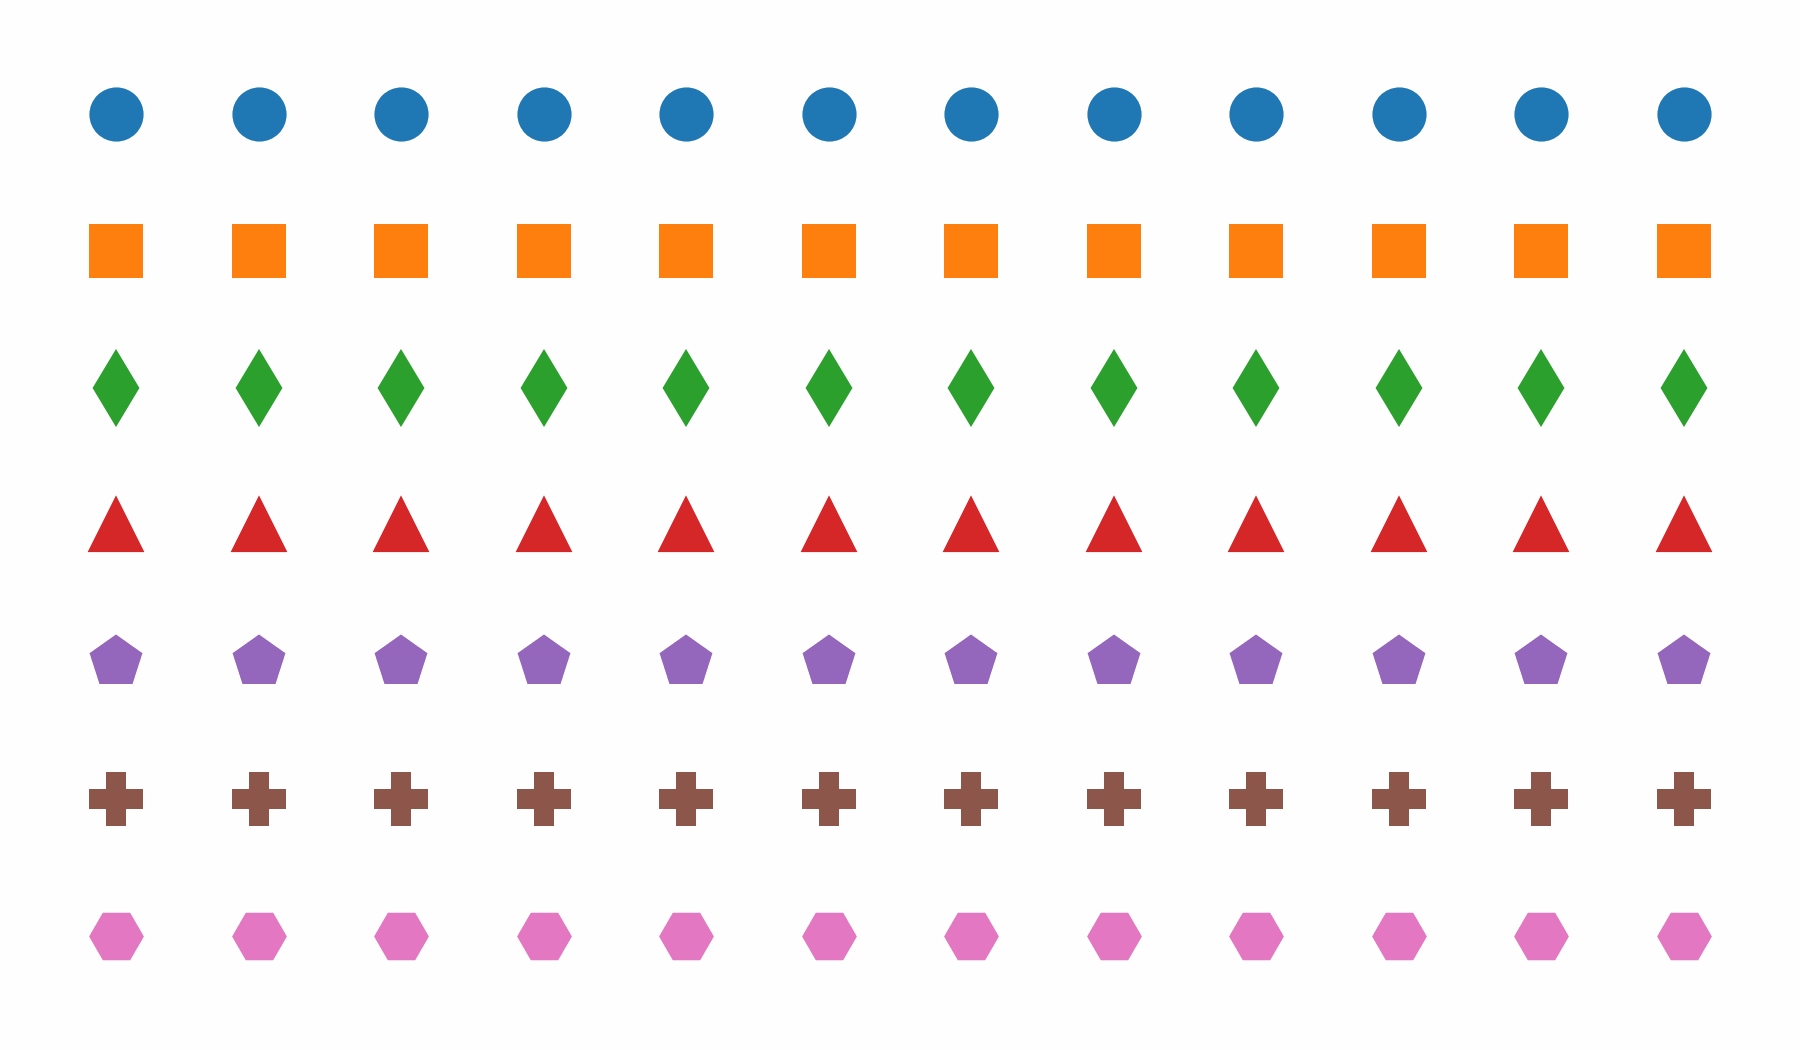

<IPython.core.display.Javascript object>

In [21]:
display(Image(filename=filename2))

In [22]:
filename3 = "resampling_phase3.gif"
savegif(filename3, draw_phase3)

<IPython.core.display.Javascript object>

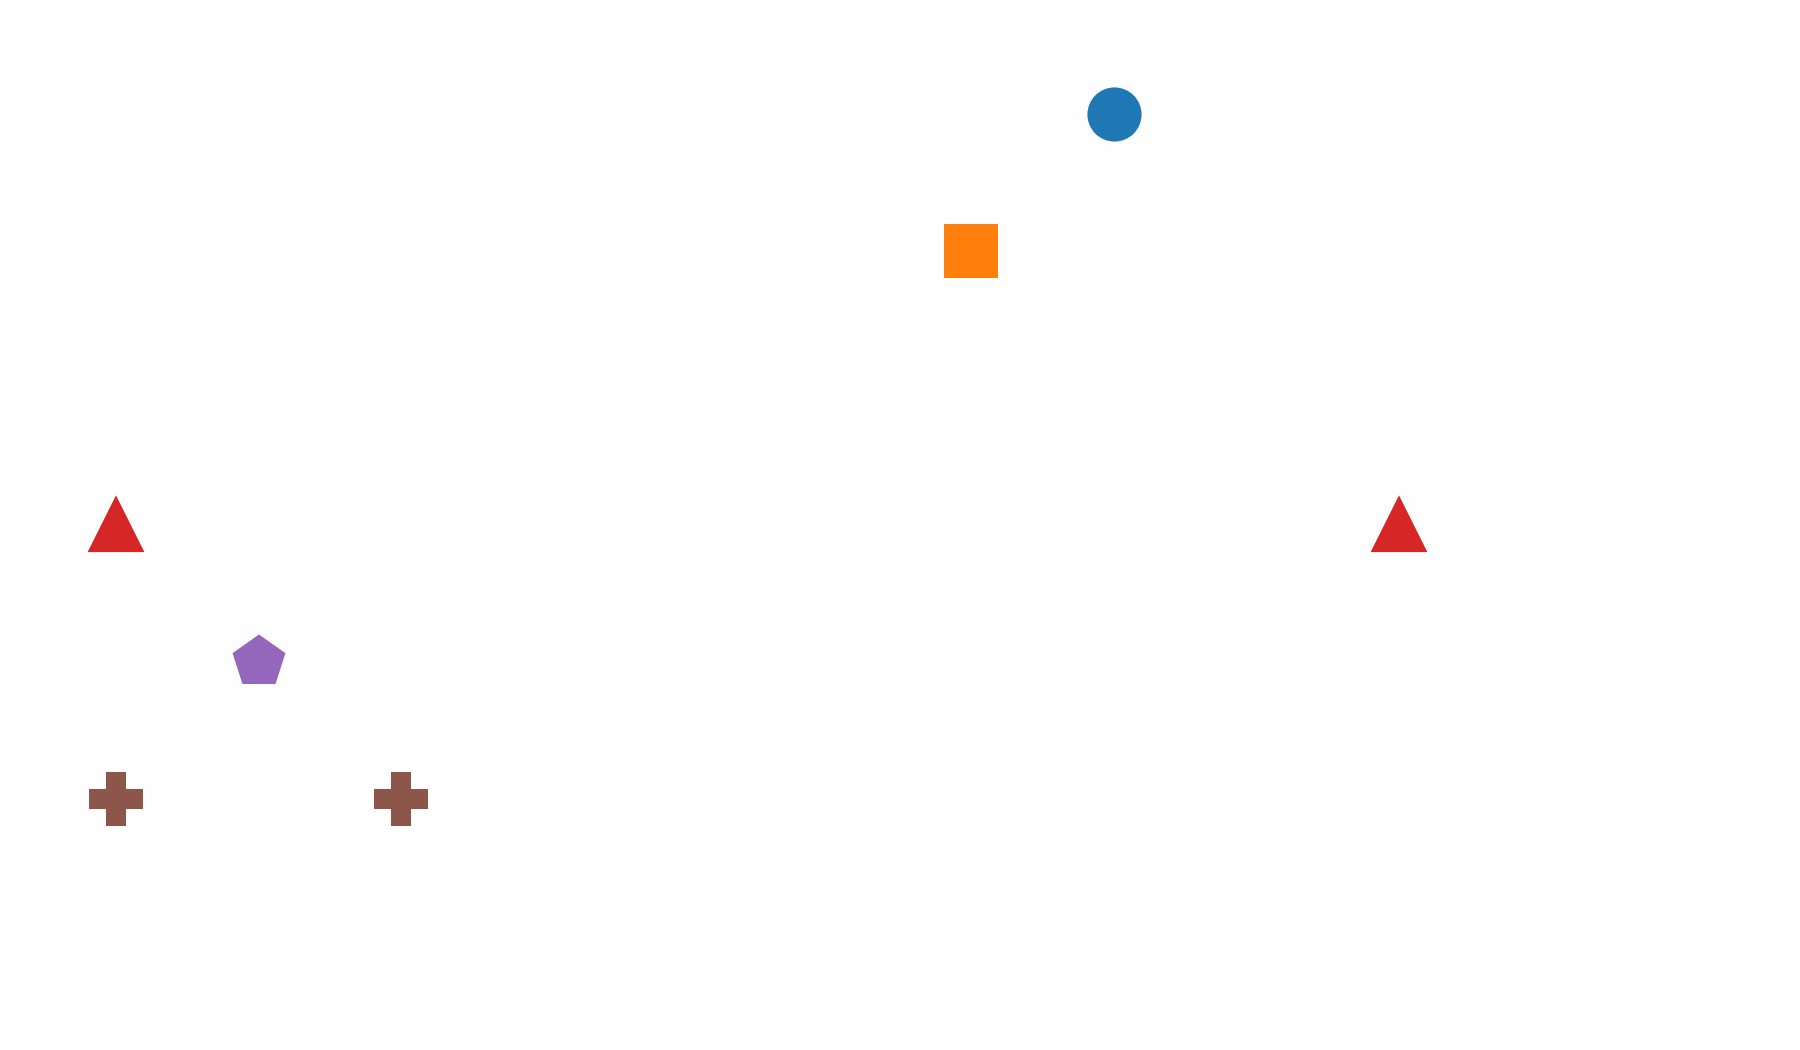

<IPython.core.display.Javascript object>

In [24]:
display(Image(filename=filename3))

In [25]:
!convert resampling_phase*.gif -delay 500 resampling.gif

<IPython.core.display.Javascript object>